[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1ObaHDemijPMbZNt6WNwVdzp9rjDZ9JWi#forceEdit=true&sandboxMode=true)


# Example of Linear Regression

This notebook guides you through an example of regression problem.
The task is to predict the circumference of the bicep muscle (denoted as `BicepC`) of women from simple features such as their height, weight and age.

This is a regression task because we are asked to predict a continuous number representing a circumference in centimeters.

We separate the numerical values in the dataset as follows:

* **features**: "height", "weight", "age"
* **target**: "BicepC"

Alternatively (as it is standard notation in [scikit-learn](https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#linear-model-from-regression-to-sparsity)) we will use:

* **X** : feature matrix
* **y** : target variable

# Load the dataset

The data is saved on a CSV file saved on disk `regression_train.csv`.
It contains a header with the name of each column and it contains a row for each woman whose bicep was measured. Every individual is identified by a unique `ID` number.

We use `pandas` to get the data from the CSV file on disk.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# training data save on disk in a file with this name
filename = "../data/regression_train.csv"

In [3]:
train_data = pd.read_csv(filename,index_col='ID')

Check the output by printing the rows and columns for 2 randomly sampled individuals

In [4]:
train_data.sample(2)

,height,weight,age,BicepC
ID,,,,
70,165.2,60.7,41,30.8
87,163.0,62.8,35,26.7


With `pandas` it is easy to get an overview of the statistical properties of numerical features:

In [5]:
train_stats = train_data.describe().transpose()
print(train_stats)

        count        mean        std    min    25%    50%    75%    max
height  107.0  157.923364   5.706031  143.6  153.2  159.0  161.5  173.0
weight  107.0   53.331776   8.187526   37.4   47.3   52.1   57.0   78.6
age     107.0   34.906542  11.055207   19.0   25.0   33.0   43.0   62.0
BicepC  107.0   26.601869   3.021058   20.6   24.5   26.0   29.1   35.0


The table above shows that we have 107 _data points_ with numerical values changing from 20.6 to 173.0 across features.

# A look at the data

For simplicity we can plot the relation of each variable with the target.
We have 3 features and 1 target, so we would need a 4-dimensional space to show the whole dataset. 

We can use `pandas` to make a quick plot of the relation between each individual variable and the rest.

In [6]:
from pandas.plotting import scatter_matrix

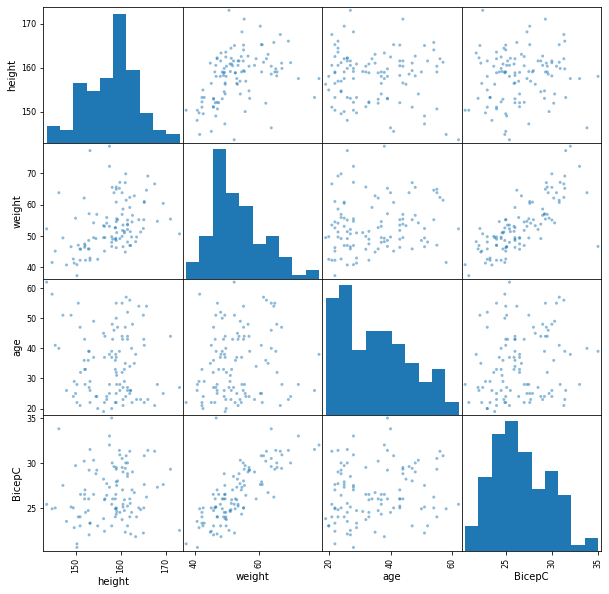

In [7]:
scatter_matrix(train_data, alpha=0.5, figsize=(10, 10), diagonal='hist');

Optionally, we can use box plot to see outliers. In this case, data are normalized beforehand to see the box plot for each attribute side by side.

In [8]:
train_data_n = (train_data - train_data.mean()) /train_data.std()
train_data_n.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
height,107.0,2.285847e-15,1.0,-2.510215,-0.827785,0.188684,0.626817,2.642228
weight,107.0,1.058343e-16,1.0,-1.945860,-0.736703,-0.150445,0.448026,3.086185
age,107.0,-2.928602e-16,1.0,-1.438828,-0.896097,-0.172456,0.732095,2.450742
BicepC,107.0,2.230822e-16,1.0,-1.986678,-0.695740,-0.199225,0.826906,2.779865


<AxesSubplot:>

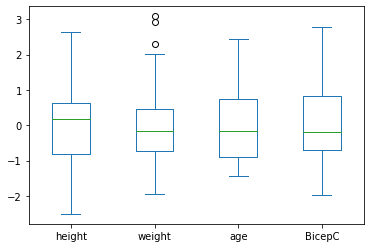

In [9]:
train_data_n.plot.box()

# Prepare the data

After loading the data in Section [Load the dataset](#load-the-dataset), we explicitly define the feature matrix and the target variable vector.

With `pandas` this is straighforward because we have a way to call the columns by name.

In [10]:
X = train_data.loc[:,["height","weight","age"]]
y = train_data.loc[:,["BicepC"]]

The commands above select all examples (with `:`) from specific columns (with given names).

We can print out the shape of the feature matrix and the target vector

In [11]:
print("Dataset shape\n Feature Matrix:{} Target Vector:{}"\
      .format(X.shape,y.shape))

Dataset shape
 Feature Matrix:(107, 3) Target Vector:(107, 1)


# Linear regression model



We define a simple linear regression model using `scikit-learn` estimators.

In [12]:
from sklearn.linear_model import LinearRegression

You can find the documentation of `LinearRegression` at this [link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) on the `scikit-learn` documentation.

This type of documentation is very helpful for understanding how to use the models.

As seen in the documentation, this model can be _trained_ (or _fitted_) by calling the [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method (this is standard practice in `scikit-learn`).

Let us define the model with a non-zero coefficient so that the formula looks like

$$ y = M \cdot X + b $$

In [13]:
model = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

# Train the model

The model is trained by comparing the results of the model with the target vector $y$ and than changing the parameters $M$ and $b$ to minimize the distance between predictions and true values

In [14]:
model.fit(X,y)

LinearRegression()

In [15]:
print("Parameters M: {}".format(model.coef_))

Parameters M: [[-0.10301893  0.30755671  0.01256214]]


In [16]:
print("Parameters b: {}".format(model.intercept_))

Parameters b: [26.0299187]


# Predictions and errors

The mean squared error (MSE) between the predictions and the target values is computed easily in `scikit-learn` if we first calculate the predictions

In [17]:
y_pred = model.predict(X)

In [18]:
from sklearn.metrics import mean_squared_error

In [19]:
print("Mean Squared Error: {}".format(mean_squared_error(y,y_pred)))

Mean Squared Error: 3.4280764900341425


The error of our model is 3.4 centimeters.

# Plot regression results

Now we use `matplotlib` to plot the results of the model and compare it with the real values in the target vector

In [20]:
import matplotlib.pyplot as plt

def plot_regression_results(ax, y_true, y_pred, model_name, scores, bodypart):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y_true.min(), y_true.max()],
            [y_true.min(), y_true.max()],
            '--r', linewidth=2)
    ax.scatter(y_true, y_pred, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = model_name + '\n Target: {}'.format(bodypart)
    ax.set_title(title)

In the next figure, a perfect model will produce predictions on the dashed red line.

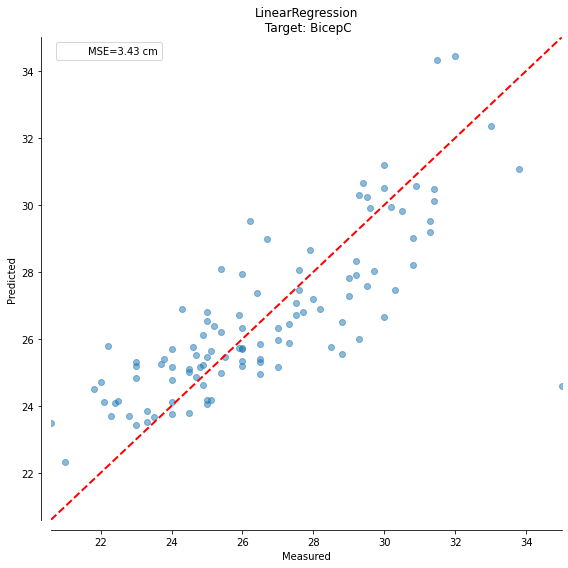

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))
y_pred = model.predict(X)
plot_regression_results(ax, y.values, y_pred,'LinearRegression','MSE={:.2f} cm'.format(mean_squared_error(y,y_pred)),"BicepC")
plt.tight_layout()
plt.show()

# Test the model

We can test how good this model fares when we look at unseen data.


We have a test dataset in `regression_test.csv` and we can look at the predictions of our trained model

## Read the data

In [22]:
test_data = pd.read_csv("../data/regression_test.csv", index_col='ID')

In [23]:
test_data.sample(2)

,height,weight,age,BicepC
ID,,,,
69,158.5,50.0,32,26.0
86,152.5,67.9,55,27.0


In [24]:
test_stats = test_data.describe().transpose()
print(test_stats)

        count    mean        std    min     25%     50%      75%    max
height   10.0  158.02   4.455159  152.5  155.00  157.70  160.900  165.2
weight   10.0   53.01   7.057455   42.6   50.35   52.10   54.350   67.9
age      10.0   32.80  10.768266   21.0   27.00   29.50   36.250   55.0
BicepC   10.0   26.45   1.677465   24.0   25.30   25.95   27.525   29.5


The test dataset is including 10 individuals.

As before mentioned, we can use box plot to see outliers. In this case, data are normalized beforehand to see the box plot for each attribute side by side.

<AxesSubplot:>

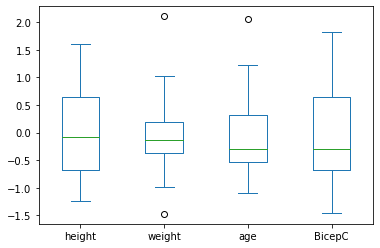

In [25]:
test_data_n = (test_data - test_data.mean()) /test_data.std()
test_data_n.describe().transpose()
test_data_n.plot.box()

## Predict with the model

Define the new feature matrix and target vector

In [26]:
X_test = test_data.loc[:,["height","weight","age"]]
y_test = test_data.loc[:,["BicepC"]]

Predict with the `LinearRegression` model and the saved parameters $M$ and $b$ from Section [Train the mode](#train-the-model)

In [27]:
y_pred = model.predict(X_test)

Plot the results

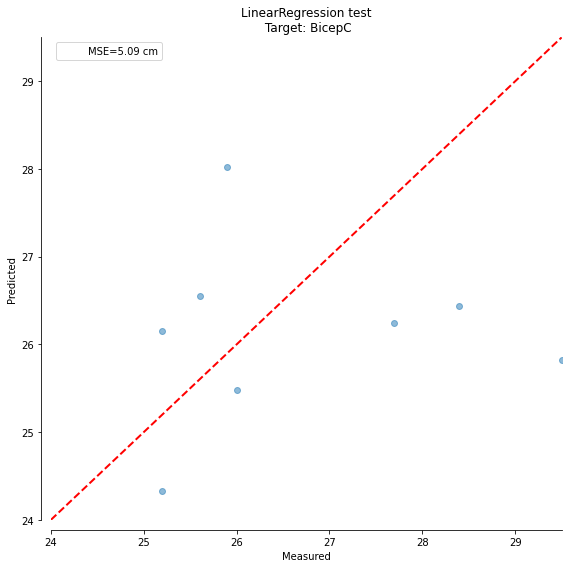

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_regression_results(ax, y_test.values, y_pred,'LinearRegression test','MSE={:.2f} cm'.format(mean_squared_error(y_test,y_pred)),"BicepC")
plt.tight_layout()
plt.show()

On the test dataset, the MSE is 5 centimeters